In [17]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
dir(keras.datasets.mnist)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'load_data']

In [7]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [9]:
len(X_train), len(X_test)

(60000, 10000)

In [11]:
X_train[0].shape

(28, 28)

In [12]:
X_train[0] # 0 : black and 255: white

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

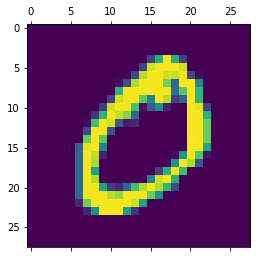

In [14]:
plt.matshow(X_train[1])

In [16]:
y_train[1]

0

In [18]:
# convert 28X28 image array to 1D Array of 784
X_train.shape

(60000, 28, 28)

In [30]:
#scaling
X_train = X_train/255
X_test = X_test/255

In [32]:
X_train_flatten=X_train.reshape(len(X_train),28*28)
X_test_flatten=X_test.reshape(len(X_test),28*28)

In [33]:
X_train_flatten.shape, X_test_flatten.shape

((60000, 784), (10000, 784))

In [34]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 588us/step - loss: 0.4882 - accuracy: 0.8786
Epoch 2/5
1875/1875 [==============================] - 1s 573us/step - loss: 0.3063 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 1s 616us/step - loss: 0.2853 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 1s 596us/step - loss: 0.2749 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 1s 614us/step - loss: 0.2675 - accuracy: 0.9257


In [35]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 0s 459us/step - loss: 0.2642 - accuracy: 0.9269


[0.2642394006252289, 0.9269000291824341]

In [36]:
y_pred=model.predict(X_test_flatten)
y_pred[0], y_test[0]

(array([1.6787613e-05, 1.6892795e-10, 5.0776362e-05, 8.8665485e-03,
        8.7222116e-07, 9.4421368e-05, 9.0365493e-10, 7.3781538e-01,
        6.7909874e-05, 9.8195672e-04], dtype=float32),
 7)

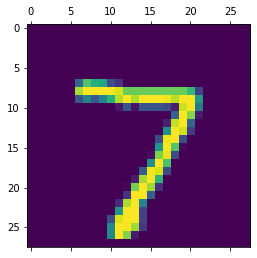

In [38]:
plt.matshow(X_test[0])

In [39]:
np.argmax(y_pred[0]) #returns index of highest value in array

7

In [42]:
y_pred_labels=[np.argmax(i) for i in y_pred]

In [44]:
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    4,    4,    3,    2,    0],
       [   0, 1108,    3,    2,    0,    1,    4,    2,   15,    0],
       [   5,    9,  931,   15,    7,    3,   10,   12,   37,    3],
       [   2,    0,   21,  917,    0,   24,    2,   13,   24,    7],
       [   2,    1,    5,    1,  913,    0,    7,    4,    9,   40],
       [  11,    3,    5,   28,   11,  777,   11,    7,   31,    8],
       [  12,    3,    8,    0,    8,   13,  908,    2,    4,    0],
       [   1,    5,   23,    3,    6,    0,    0,  955,    2,   33],
       [   6,    7,    7,   19,    9,   23,    8,   13,  873,    9],
       [  10,    7,    1,   10,   20,    6,    0,   23,    8,  924]])>

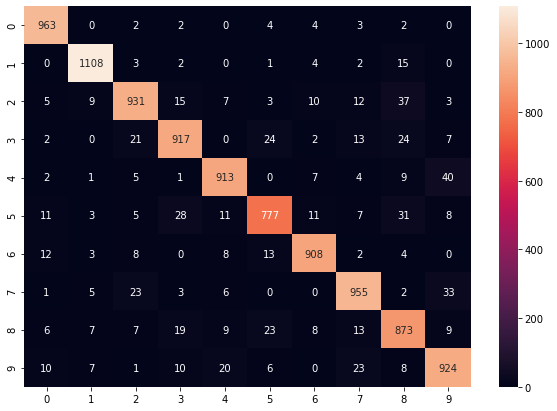

In [48]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')

In [50]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 764us/step - loss: 0.2960 - accuracy: 0.9180
Epoch 2/5
1875/1875 [==============================] - 1s 768us/step - loss: 0.1408 - accuracy: 0.9593
Epoch 3/5
1875/1875 [==============================] - 1s 763us/step - loss: 0.1009 - accuracy: 0.9702
Epoch 4/5
1875/1875 [==============================] - 1s 758us/step - loss: 0.0752 - accuracy: 0.9778
Epoch 5/5
1875/1875 [==============================] - 1s 769us/step - loss: 0.0624 - accuracy: 0.9809


In [51]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 0s 567us/step - loss: 0.0816 - accuracy: 0.9740


[0.0816345363855362, 0.9739999771118164]

In [55]:
# dot product and broadcasting

A = np.array([10,20,30])
B = np.array([[1,2,3],[4,5,6],[7,8,9]])

print(A*B) # broadcasting
print("--------------------------")
print(np.dot(A,B)) #Matrix Multiplication

[[ 10  40  90]
 [ 40 100 180]
 [ 70 160 270]]
--------------------------
[300 360 420]
